## A brief tutorial notebook showing how to do point-mass microlensing related computations.

In [13]:
#!/home/anuj.mishra/anaconda3/envs/igwn-py39/bin/python3

import numpy as np
from time import time

# import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.colors import ListedColormap
# mpl.rcParams['figure.figsize'] = (8.0, 4.0)
# # mpl.rcParams['text.usetex'] = True
# mpl.rcParams['font.size'] = 22
# mpl.rcParams['xtick.labelsize'] = 22.0
# mpl.rcParams['ytick.labelsize'] = 22.0
# mpl.rcParams['lines.markersize'] = 10.0
# mpl.rcParams['axes.axisbelow'] = True
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = 'Computer Modern'

import gwmat 

### Lensing amplification factor F(f) due to an isolated point-mass lens.

In [14]:
help(gwmat.point_lens)

Help on PointLens in module gwmat.point_lens object:

class PointLens(builtins.object)
 |  A class containing functions for studying microlensing
 |  due to an isolated point-mass lens.
 |  In such cases, two images are formed:
 |  one minima (type I) and one saddle (type II).
 |  
 |  Methods defined here:
 |  
 |  Ff_analytic(self, f, ml, y, zl=0)
 |      Returns amplification factor, F(f, ml, y, zl=0),
 |      for point lens using actual analytic formula.
 |      It breaks down, or is difficult to compute,
 |      when the system approaches geometrical optics regime.
 |      
 |      This function is dimensionful variant of Fw_analytic().
 |      
 |      Parameters
 |      ----------
 |      fs : float
 |          Frequency (in Hz).
 |      ml : float
 |          Microlens mass.
 |      y : float
 |         The impact parameter.
 |      zl : float, optional
 |          Lens-redshift. Default = 0
 |          (this is equivalent to absorbing the (1+zl) term into
 |          ml thereb

#### One can generate amplification factors using either of the classes: `gwmat.point_lens` (a Python class) or `gwmat.cythonized_point_lens` (a module written in Cython which is much faster than the python class as it uses C++ functionalities.) Below, we show comparision between the two.

In [15]:
mlz = 1e3  # redshifted lens mass
yl = 1.0   # impact parameter
fs = np.arange(20, 2048, 1/16)   # frequency array for analysing a 4s duration event with f_low=20 Hz and f_high= 1024 Hz.

In [16]:
%%timeit -o
Ffs = gwmat.point_lens.Ff_effective_map(fs, mlz, yl)

789 ms ± 33.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 789 ms ± 33.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [17]:
Ffs = gwmat.point_lens.Ff_effective_map(fs, mlz, yl)

In [18]:
res = _
time_python = res.average
Ffs_python = Ffs

In [19]:
%%timeit -o
Ffs = [gwmat.cythonized_point_lens.Ff_effective(f, ml=mlz, y=yl) for f in fs]

100 ms ± 5.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 100 ms ± 5.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [20]:
Ffs = [gwmat.cythonized_point_lens.Ff_effective(f, ml=mlz, y=yl) for f in fs]

In [21]:
res = _
time_cython = res.average
Ffs_cython = Ffs

In [22]:
if  np.allclose(Ffs_python, Ffs_cython):
    print("Python and Cython results are consistent with each other.")
else:
    raise Warning("Python and Cython results are NOT consistent with each other. Check for any inconsistency in the inputs.")    
print("\nCython implementation is ~ {:.3f} faster than the Python one!\n".format(time_python/time_cython))

Python and Cython results are consistent with each other.

Cython implementation is ~ 7.884 faster than the Python one!



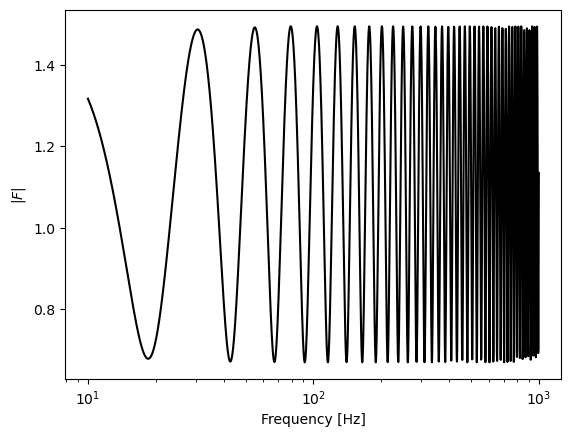

In [23]:
mlz = 1e3  # redshifted lens mass
yl = 1.0   # impact parameter
fs = np.logspace(1, 3, num=2000, endpoint=True, base=10.0)
t1 = time()
Ffs = [gwmat.cythonized_point_lens.Ff_effective(f, ml=mlz, y=yl) for f in fs]

plt.plot(fs, np.abs(Ffs), color='black')

plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$|F|$')
plt.show()

## 2. Checking microlensing source

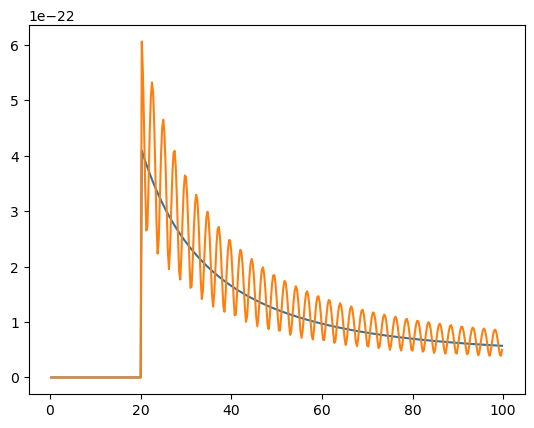

In [24]:
import gwmat
from gwmat.bilby_custom_FD_source_models import microlensing_source

fs=np.arange(0.25,100, 0.25)
res = microlensing_source.point_lens_microlensing_binary_black_hole(
    frequency_array=fs,
    mass_1=40,
    mass_2=40,
    luminosity_distance=100,
    a_1=0,
    tilt_1=0,
    phi_12=0,
    a_2=0,
    tilt_2=0,
    phi_jl=0,
    theta_jn=0,
    phase=0,
    Log_Mlz=-10,
    yl=5,
    # **kwargs,
)

hpul = res["plus"]

res = microlensing_source.point_lens_microlensing_binary_black_hole(
    frequency_array=fs,
    mass_1=40,
    mass_2=40,
    luminosity_distance=100,
    a_1=0,
    tilt_1=0,
    phi_12=0,
    a_2=0,
    tilt_2=0,
    phi_jl=0,
    theta_jn=0,
    phase=0,
    Log_Mlz=4,
    yl=1,
    # **kwargs,
)

hpml = res["plus"]

fs=np.arange(0.25,100, 0.25)
plt.plot(fs, abs(hpul))
plt.plot(fs, abs(hpml))
plt.show()